<a href="https://colab.research.google.com/github/EviEno/Bank-Customer-Churn-Prediction-Using-H2O-AutoML/blob/main/Bank_Customer_Churn_Prediction_Using_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name: Bank Customer Churn Prediction using H2O Auto ML


### 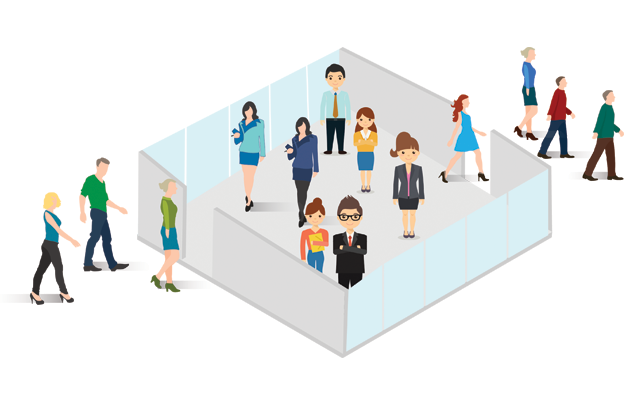

## Context:
In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## We will be using ANN models and H2O Auto ML in this project

### Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN
- Model Building and Prediction using H2O Auto ML

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#Data Analysis

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## We will plot a Pie Chart

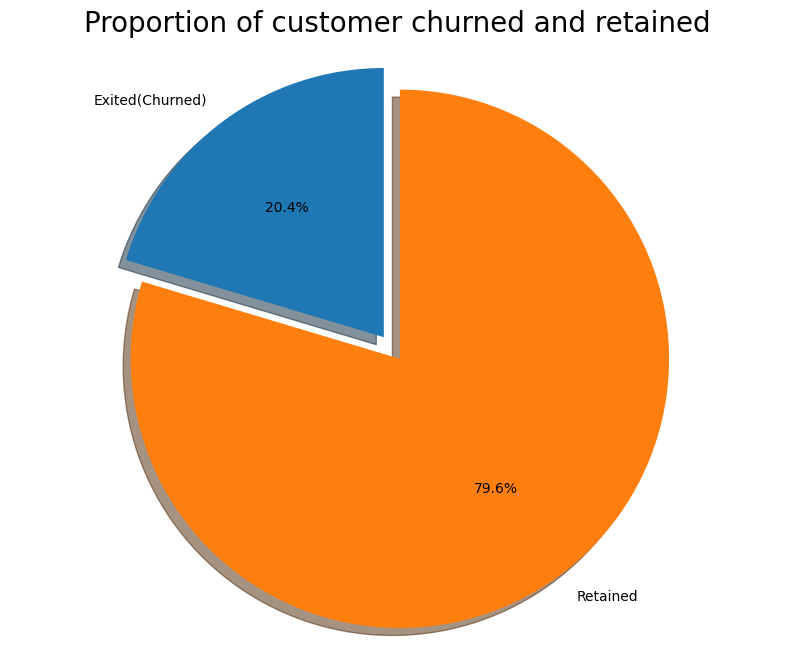

In [12]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [13]:
import seaborn as sns

<Axes: xlabel='IsActiveMember', ylabel='count'>

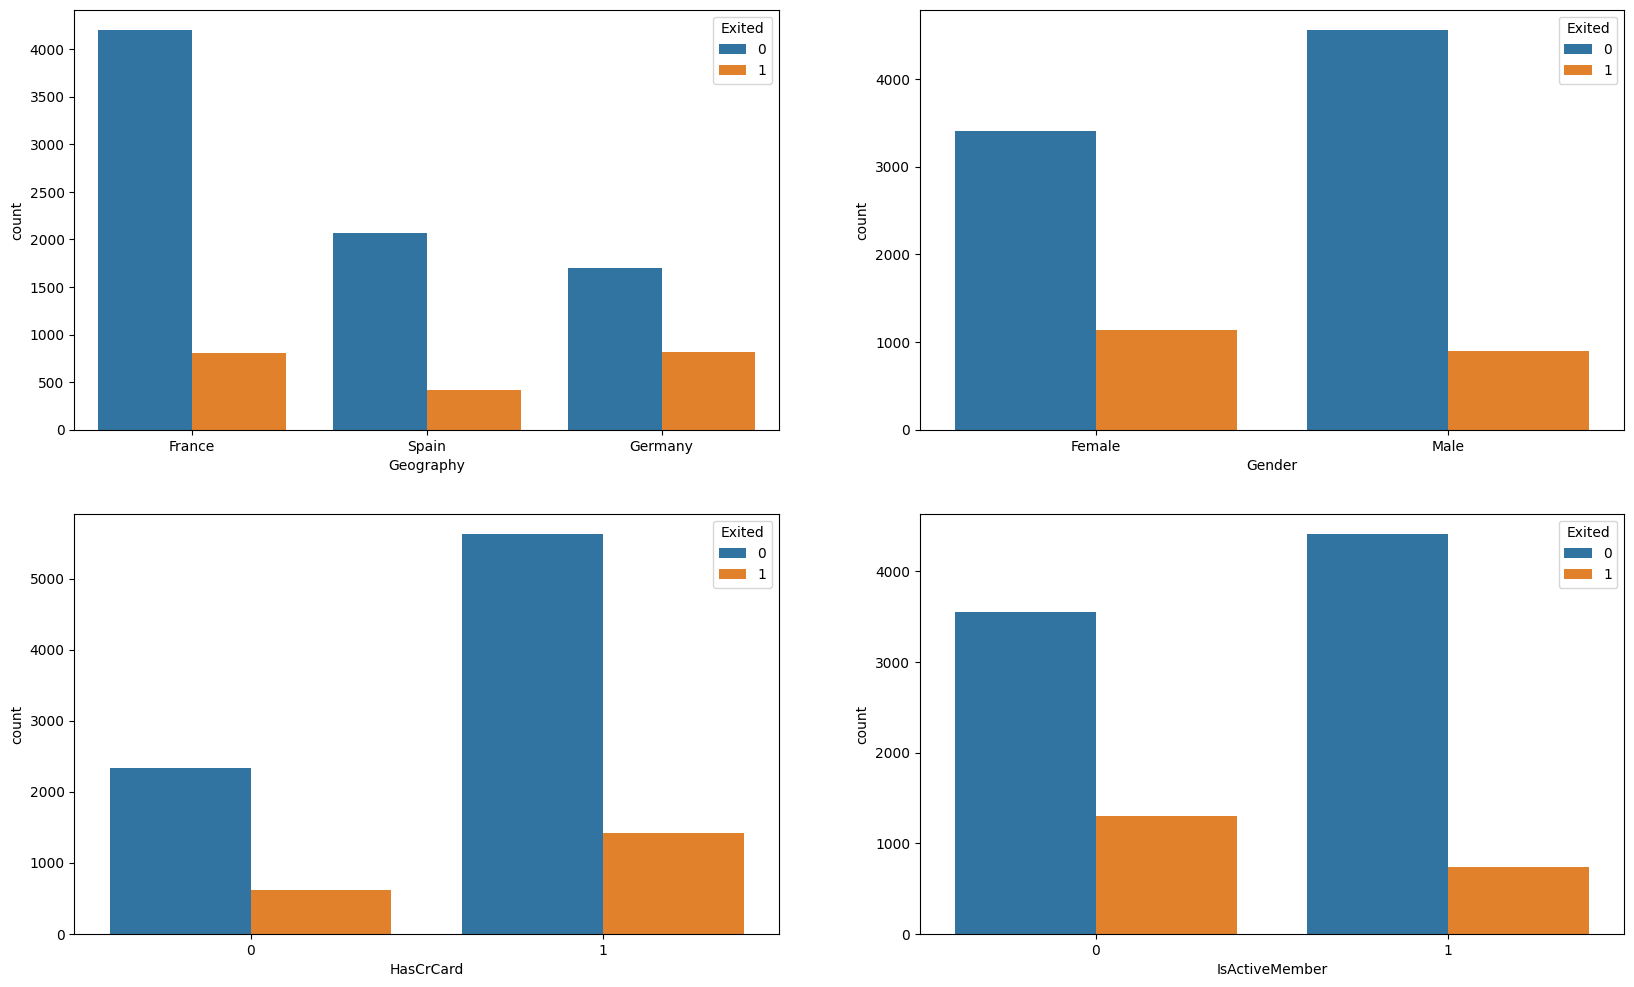

In [14]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

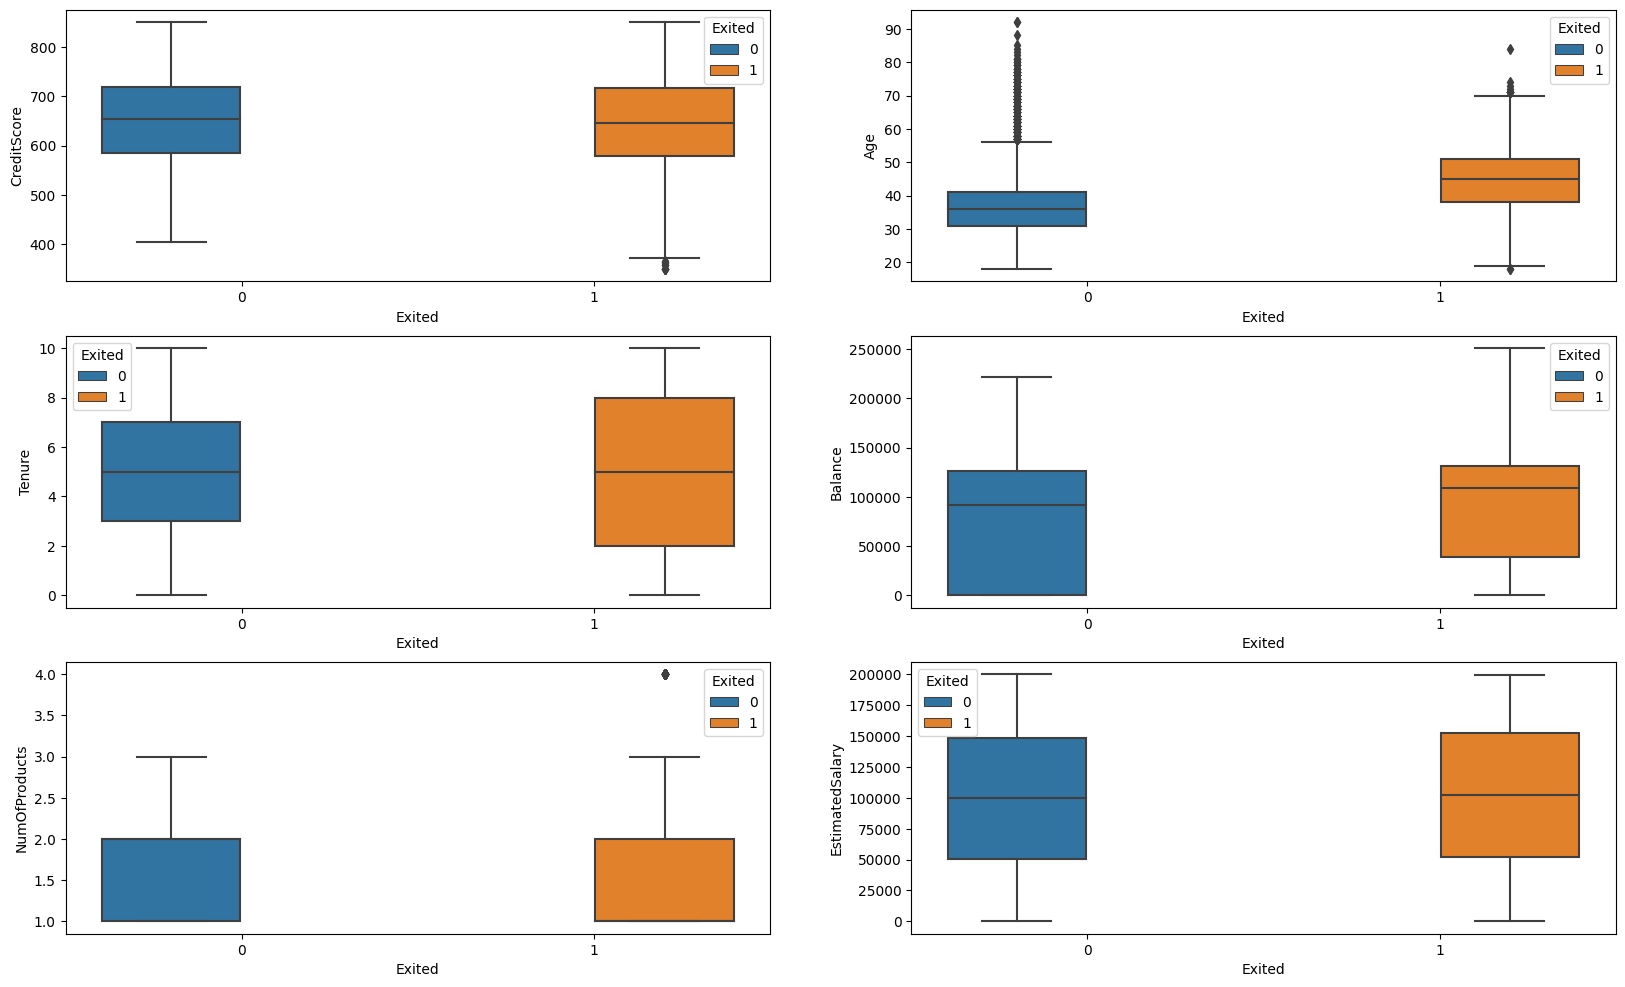

In [15]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

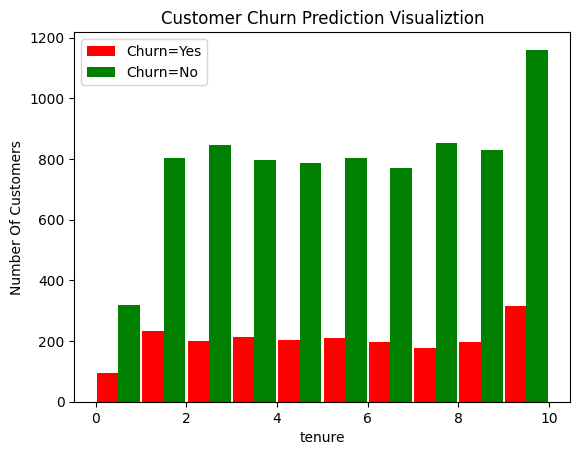

In [16]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

In [18]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

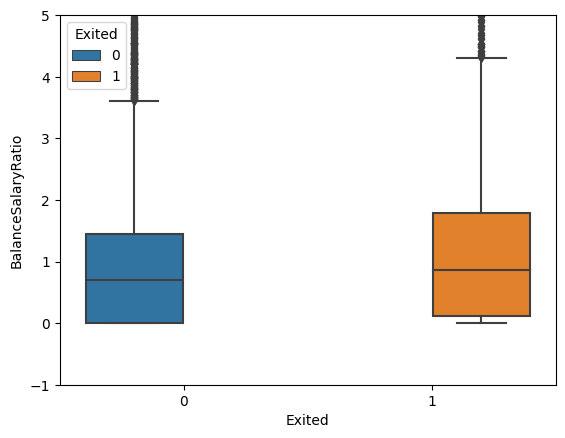

In [19]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

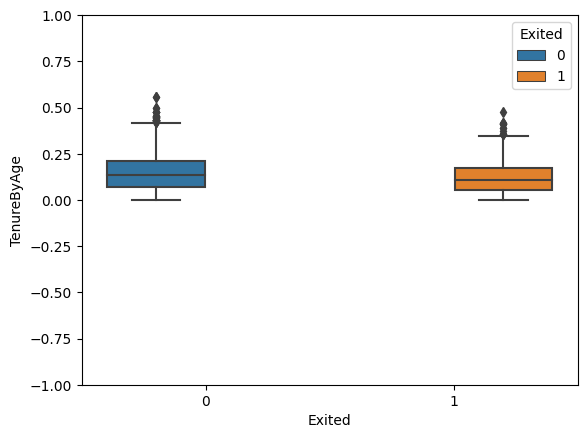

In [20]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [21]:
# Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life

df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [22]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


#### Printing the categorical variables

In [23]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [24]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [ ]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [25]:
df1 = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<Axes: >

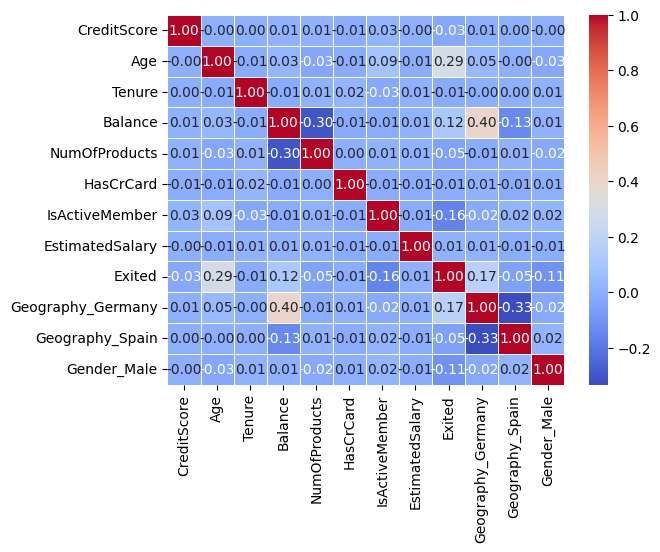

In [26]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X,y=sm.fit_resample(X,y)
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Model Building and Prediction

#### The Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

### A Sequential model is not appropriate when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [33]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 3)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 5s 7ms/step - loss: 0.6111 - accuracy: 0.6669 - val_loss: 0.5308 - val_accuracy: 0.7512
Epoch 2/100
319/319 [==============================] - 3s 9ms/step - loss: 0.4798 - accuracy: 0.7752 - val_loss: 0.4710 - val_accuracy: 0.7779
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.7905 - val_loss: 0.4514 - val_accuracy: 0.7912
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8009 - val_loss: 0.4371 - val_accuracy: 0.7998
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8087 - val_loss: 0.4234 - val_accuracy: 0.8093
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8131 - val_loss: 0.4153 - val_accuracy: 0.8151
Epoch 7/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8159 - val_loss: 0.4089 - val_accuracy: 0.8203

In [37]:
y_rec = model.predict(X_test)

100/100 [==============================] - 0s 3ms/step


### Converting our predictions to 0,1 to check accuracy

In [38]:
y_pred = np.where(y_rec>=0.5,1,0)

### Checking the accuracy

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8358443188951663

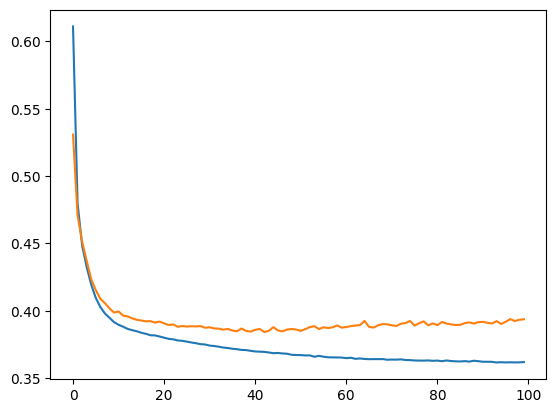

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

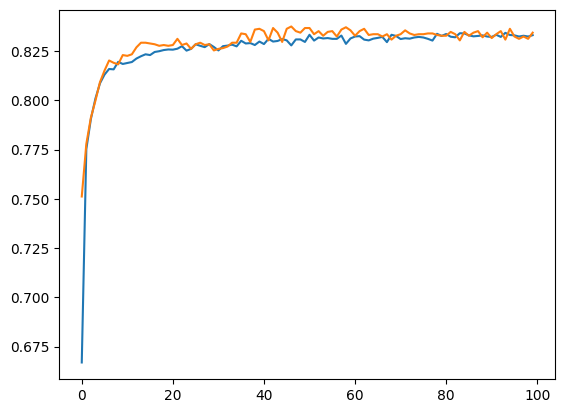

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Using Auto ML

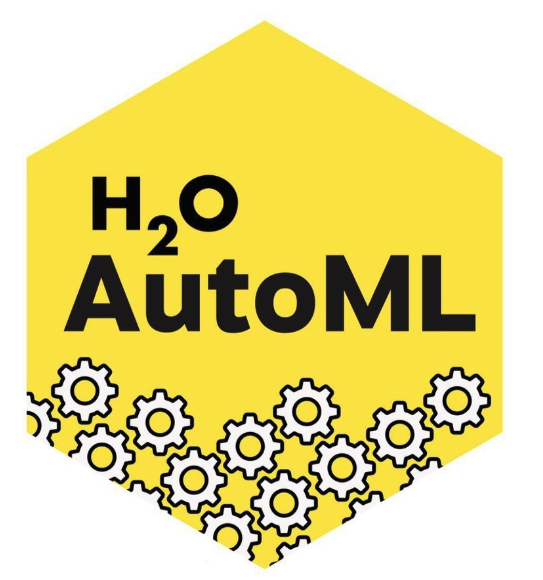

H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [42]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [43]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=94924c8c9b8983d935430fcf00b2858e65d5304d6801d0e4ebfa2c3cdb05d8a9
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


## Importing the h2o Python module and H2OAutoML class

In [44]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')
##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm3xvfn3x
  JVM stdout: /tmp/tmpm3xvfn3x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm3xvfn3x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_sr3o0k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading the data

In [46]:
df = h2o.import_file("/content/drive/MyDrive/Data/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


## H2O auto ml can do all the data preprocessing techniques

In [48]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [49]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0


In [50]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

### Defining the model

In [51]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [52]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
14:33:37.407: Project: AutoML_1_20230730_143337
14:33:37.409: Setting stopping tolerance adaptively based on the training frame: 0.011219677721630005
14:33:37.410: Build control seed: 10
14:33:37.411: training frame: Frame key: AutoML_1_20230730_143337_training_py_3_sid_aa63    cols: 14    rows: 7944  chunks: 8    size: 426346  checksum: 24346495013221601
14:33:37.411: validation frame: NULL
14:33:37.411: leaderboard frame: NULL
14:33:37.411: blending frame: NULL
14:33:37.412: response column: Exited
14:33:37.412: fold column: null
14:33:37.412: weights column: null
14:33:37.446: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


### Seeing the Leaderboard

In [53]:
lb = aml.leaderboard

In [54]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230730_143337,0.323841,0.104873,0.214974,0.227708,0.104873
StackedEnsemble_BestOfFamily_1_AutoML_1_20230730_143337,0.324217,0.105117,0.215947,0.228151,0.105117
GBM_1_AutoML_1_20230730_143337,0.3255,0.10595,0.219322,0.229215,0.10595
GBM_2_AutoML_1_20230730_143337,0.326503,0.106604,0.216615,0.229854,0.106604
GBM_3_AutoML_1_20230730_143337,0.327072,0.106976,0.216851,0.230283,0.106976
DRF_1_AutoML_1_20230730_143337,0.330481,0.109218,0.218929,0.233968,0.109218
GBM_4_AutoML_1_20230730_143337,0.331088,0.109619,0.220745,0.233597,0.109619
XGBoost_3_AutoML_1_20230730_143337,0.332426,0.110507,0.222118,0.234842,0.110507
XRT_1_AutoML_1_20230730_143337,0.347453,0.120724,0.25866,0.24855,0.120724
XGBoost_2_AutoML_1_20230730_143337,0.357874,0.128074,0.244636,0.258443,0.128074


## Getting all the model ids

In [55]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [56]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230730_143337',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230730_143337',
 'GBM_1_AutoML_1_20230730_143337',
 'GBM_2_AutoML_1_20230730_143337',
 'GBM_3_AutoML_1_20230730_143337',
 'DRF_1_AutoML_1_20230730_143337',
 'GBM_4_AutoML_1_20230730_143337',
 'XGBoost_3_AutoML_1_20230730_143337',
 'XRT_1_AutoML_1_20230730_143337',
 'XGBoost_2_AutoML_1_20230730_143337',
 'XGBoost_1_AutoML_1_20230730_143337',
 'GLM_1_AutoML_1_20230730_143337']

In [57]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09781127094636685
RMSE: 0.3127479351592379
MAE: 0.20368721296057343
RMSLE: 0.22123706690267889
Mean Residual Deviance: 0.09781127094636685
R^2: 0.3793350467033527
Null degrees of freedom: 2055
Residual degrees of freedom: 2049
Null deviance: 324.1998744484297
Residual deviance: 201.09997306573024
AIC: 1071.0602551063362

### Getting the model details for best performing model

In [58]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [59]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20230730_143337',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20230730_143337'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230730_143337_training_py_3_sid_aa63',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230730_143337_training_py_3_sid_aa63'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230730_143337_training_py_3_sid_aa63',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230730_143337_training_py_3_sid_aa63'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [ ]:
#output.varimp_plot()

In [60]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [61]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [62]:
y_pred

predict
0.133517
0.0239484
-0.0202407
0.272341
0.455206
0.0220946
0.0166938
0.435084
0.212015
0.284094
